# Importing libraries

In [2]:
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
import textstat
import numpy as np
import re
import nltk

tqdm.pandas()

/Users/sourabhzanwar/opt/anaconda3/lib/python3.8/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
df = pd.read_csv('./datasets_final_merged.csv', low_memory=False)
#df.reset_index(inplace=True)
df.columns

Index(['index', 'boardgame', 'review_title', 'rating', 'review_text',
       'review_date', 'text_nsw', 'flesch_reading_ease',
       'flesch_kincaid_grade', 'coleman_liau_index',
       'automated_readability_index', 'difficult_words', 'gunning_fog',
       'text_standard', 'sentence_count', 'lexicon_count', 'sent_negative',
       'sent_neutral', 'sent_positive', 'Type', 'lemmatize', 'review_id',
       'word count'],
      dtype='object')

In [14]:
df['word count'] = np.zeros(len(df))
for i in tqdm(range(len(df))):
    df['word count'][i] = textstat.lexicon_count(df['lemmatize'][i])

  0%|                                                                                       | 0/259257 [00:00<?, ?it/s]<ipython-input-14-26bdbd17d81d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word count'][i] = textstat.lexicon_count(df['lemmatize'][i])
100%|████████████████████████████████████████████████████████████████████████| 259257/259257 [01:28<00:00, 2934.83it/s]


In [4]:
amazon = df[df['Type']=='amazon']
bgg = df[df['Type']=='boardgamesgeek']

In [44]:
l = amazon.boardgame.value_counts()
l[l>1000]

Cards Against Humanity                                                                             22323
Cards Against Humanity: First Expansion                                                             5381
Cards Against Humanity: Second Expansion                                                            3524
Spot It!                                                                                            2804
Cards Against Humanity: Third Expansion                                                             2483
Cards Against Humanity: Fourth Expansion                                                            2051
Five Crowns                                                                                         1431
Perplexus Epic                                                                                      1262
Exploding Kittens Card Game - Family-Friendly Party Games - Card Games for Adults, Teens & Kids     1184
7 Wonders                                              

In [39]:
bgg.boardgame.value_counts()

463       50
21804     50
15363     50
110327    50
155969    50
          ..
4505       1
147352     1
54745      1
155702     1
4724       1
Name: boardgame, Length: 4775, dtype: int64

In [5]:
amazon.sentence_count.describe()

count    214997.000000
mean          3.306060
std           4.811203
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max         209.000000
Name: sentence_count, dtype: float64

In [7]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=40)  # fontsize of the figure title

In [19]:
len(amazon)

214997

In [34]:
len(bgg[bgg['word count'] < 2500])

43786

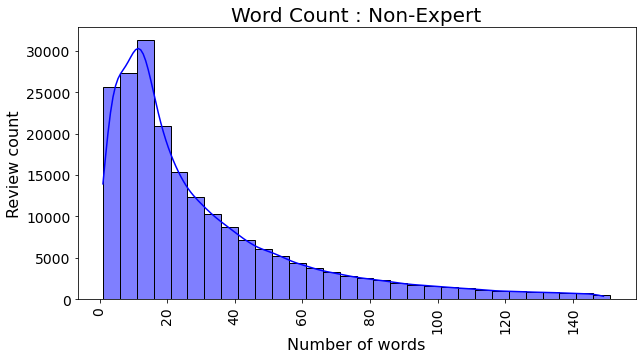

In [29]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data = amazon[amazon['word count'] < 150], x = 'word count', binwidth=5, kde=True, color='Blue')
ax.set_title("Word Count : Non-Expert")
ax.set_ylabel('Review count')
ax.set_xlabel('Number of words')
plt.xticks(rotation=90)
plt.savefig('Word Count Amazon Reviews oh.png', bbox_inches="tight")

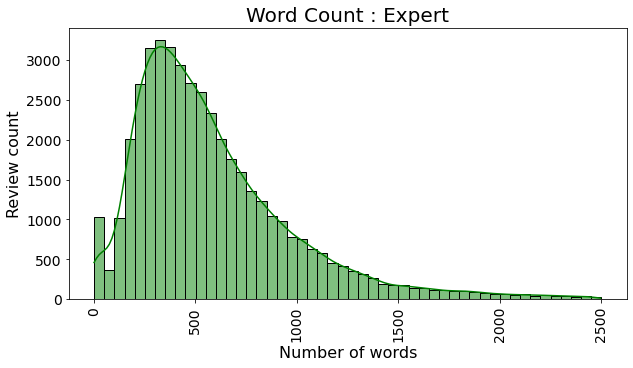

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data = bgg[bgg['word count'] < 2500], x = 'word count', binwidth=50, kde=True, color='green')
ax.set_title("Word Count : Expert")
ax.set_ylabel('Review count')
ax.set_xlabel('Number of words')
plt.xticks(rotation=90)
plt.savefig('Word Count BGG Reviews oh.png', bbox_inches="tight")

# Word Count

In [34]:
amazon_temp = amazon[amazon['word count']<500]
print(amazon['word count'].describe())
print(amazon_temp['word count'].describe())
fig, ax = plt.subplots(figsize=(24,12))
ax.scatter(x=amazon_temp['index'], y=amazon_temp["word count"])

count    214997.000000
mean         43.401899
std          74.703157
min           1.000000
25%          11.000000
50%          21.000000
75%          47.000000
max        2516.000000
Name: word count, dtype: float64
count    214078.000000
mean         40.424971
std          56.056070
min           1.000000
25%          11.000000
50%          21.000000
75%          47.000000
max         499.000000
Name: word count, dtype: float64


In [13]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(amazon[amazon['word count']<100], ax=ax)
ax.figure.legend(title='Reviewer', labels=['non-Expert'])
ax.set_title("Reviews length")
ax.set_ylabel('Review count')
ax.set_xlabel('Review length (words)')
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fa569934e50> (for post_execute):


KeyboardInterrupt: 

count    44259.000000
mean       617.036445
std        499.813320
min          1.000000
25%        313.000000
50%        497.000000
75%        772.000000
max      11166.000000
Name: word count, dtype: float64
count    43772.000000
mean       586.466508
std        396.416011
min          1.000000
25%        310.000000
50%        492.000000
75%        758.000000
max       2509.000000
Name: word count, dtype: float64


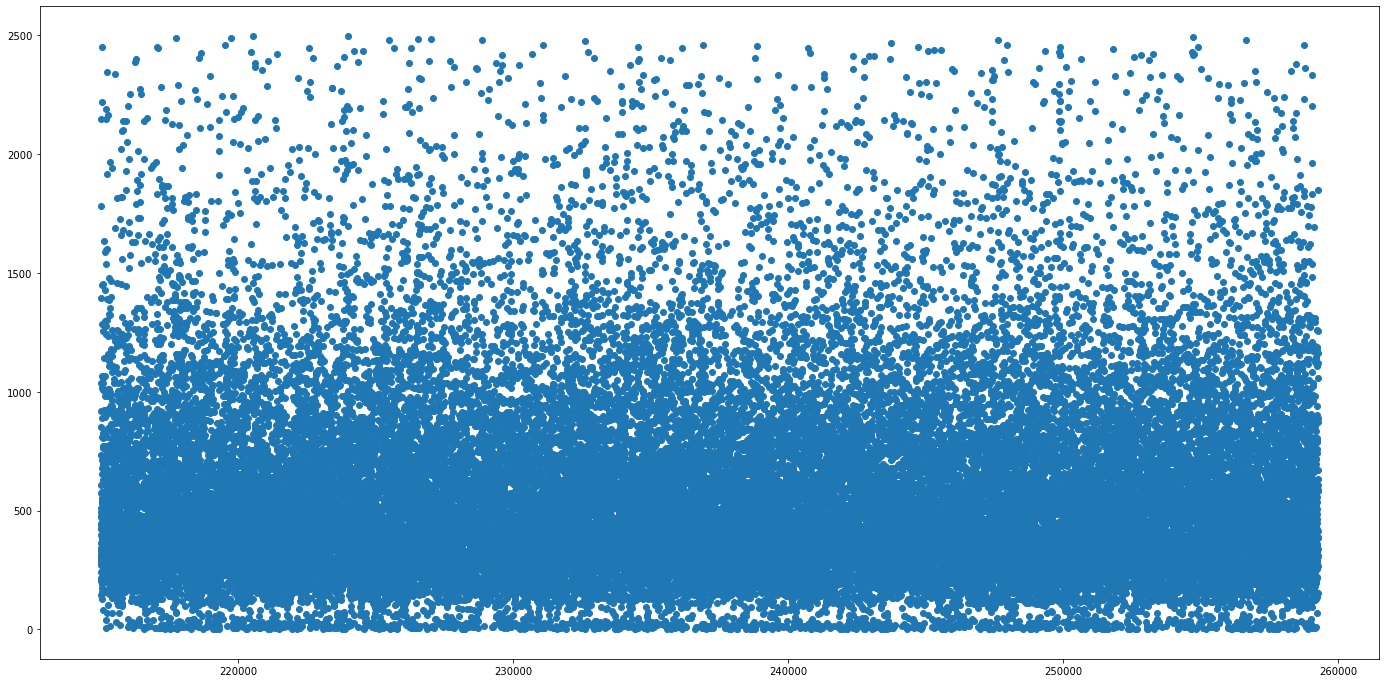

In [36]:
print(bgg['word count'].describe())
print(bgg_temp['word count'].describe())
bgg_temp = bgg[bgg['word count']<2500]
fig, ax = plt.subplots(figsize=(24,12))
ax.scatter(x=bgg_temp['index'], y=bgg_temp["word count"])

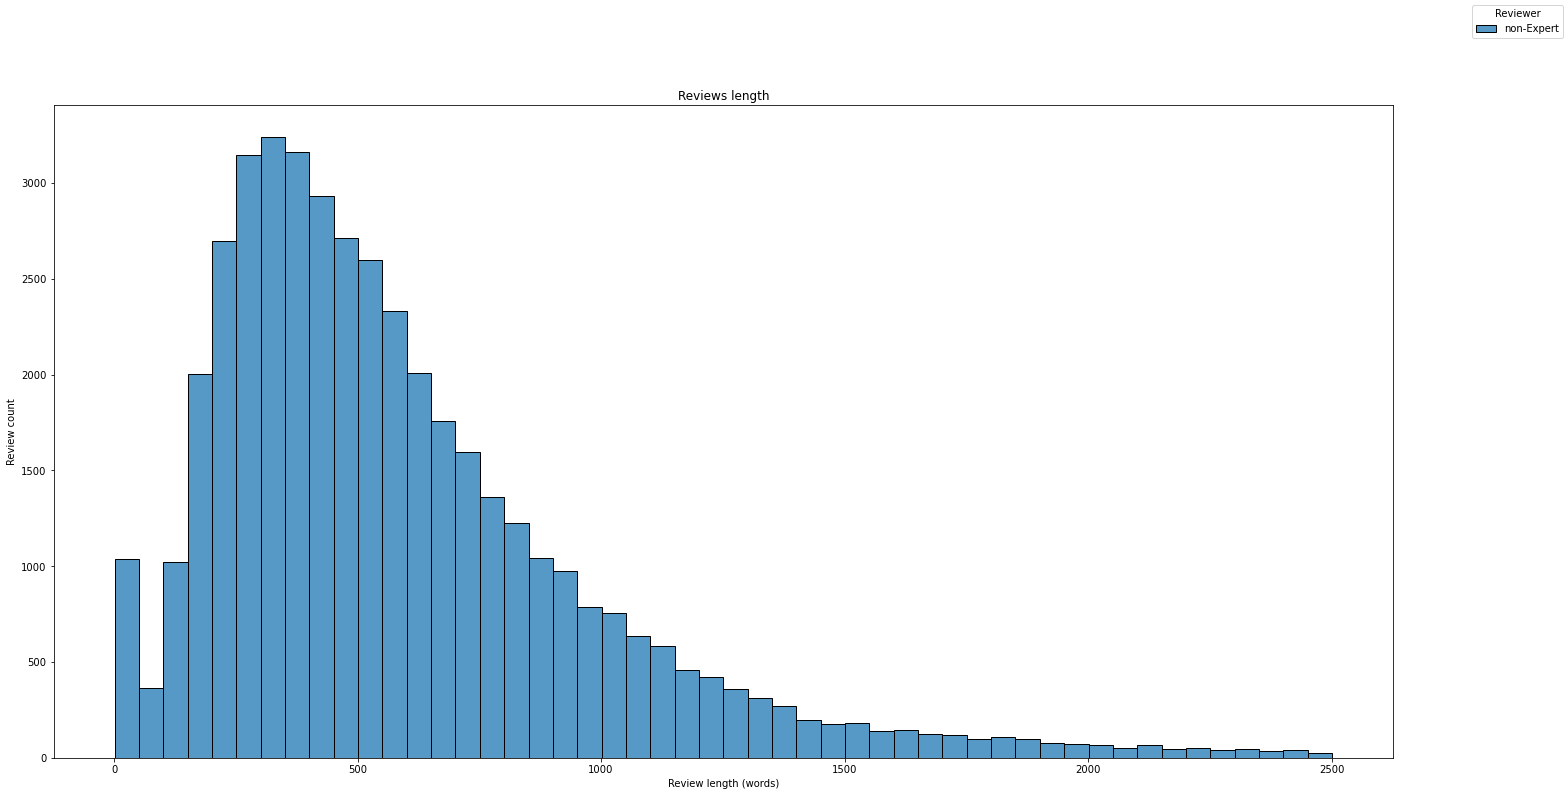

In [37]:
fig, ax = plt.subplots(figsize=(24,12))
sns.histplot(bgg_temp['word count'], ax=ax,  binwidth=50)
ax.figure.legend(title='Reviewer', labels=['non-Expert'])
ax.set_title("Reviews length")
ax.set_ylabel('Review count')
ax.set_xlabel('Review length (words)')
plt.show()

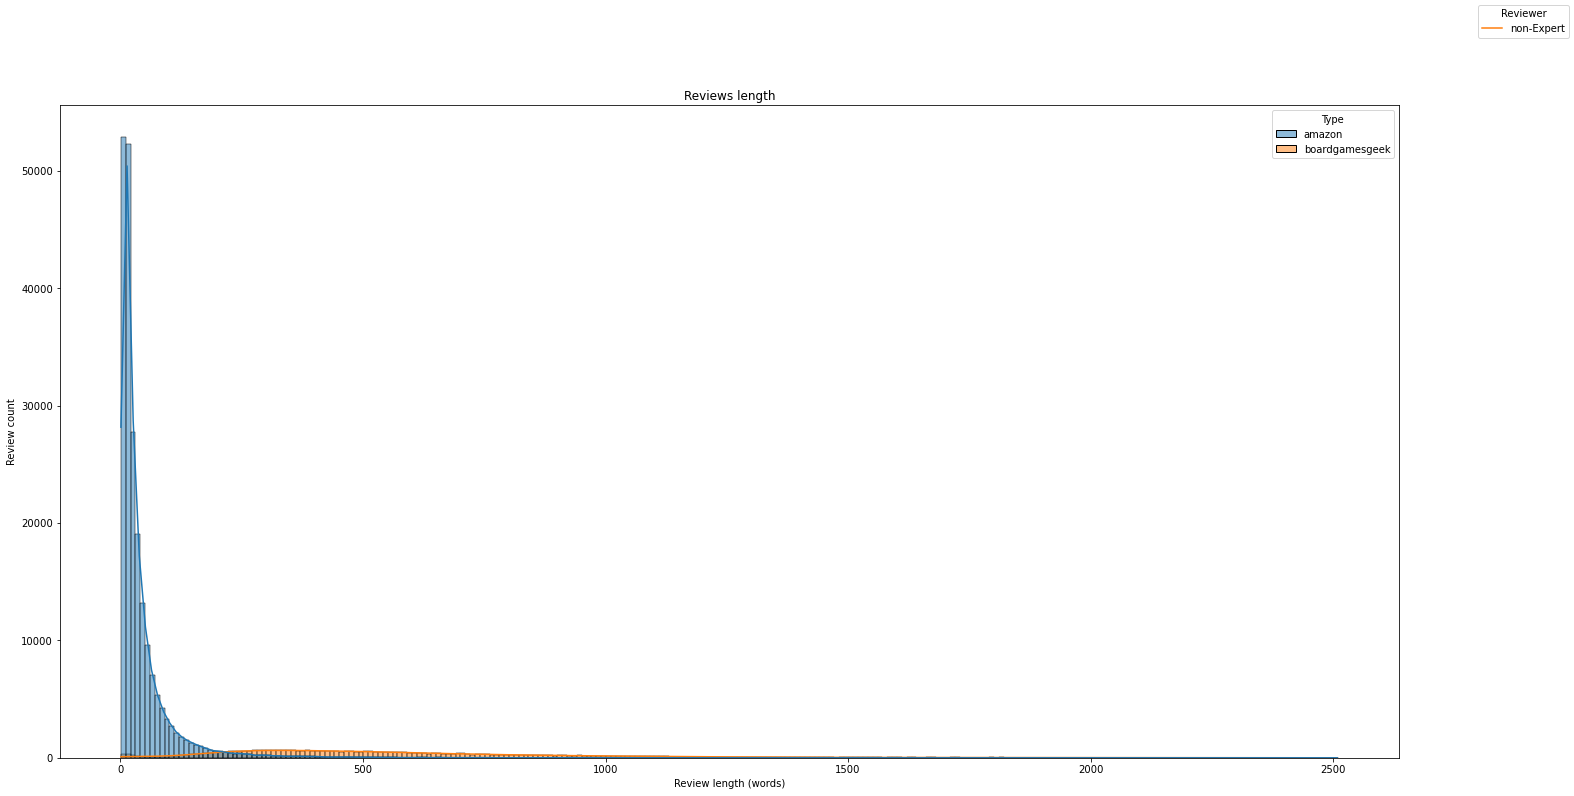

In [40]:
df_temp = df[df['lexicon_count']<2500]
fig, ax = plt.subplots(figsize=(24,12))
sns.histplot(data = df_temp, x = 'word count', ax=ax,  binwidth=10, hue='Type', kde=True)
ax.figure.legend(title='Reviewer', labels=['non-Expert'])
ax.set_title("Reviews length")
ax.set_ylabel('Review count')
ax.set_xlabel('Review length (words)')
plt.show()

## Sentence Count

In [45]:
bgg.sentence_count.describe()

count    44259.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: sentence_count, dtype: float64

C:\Users\hp383055\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


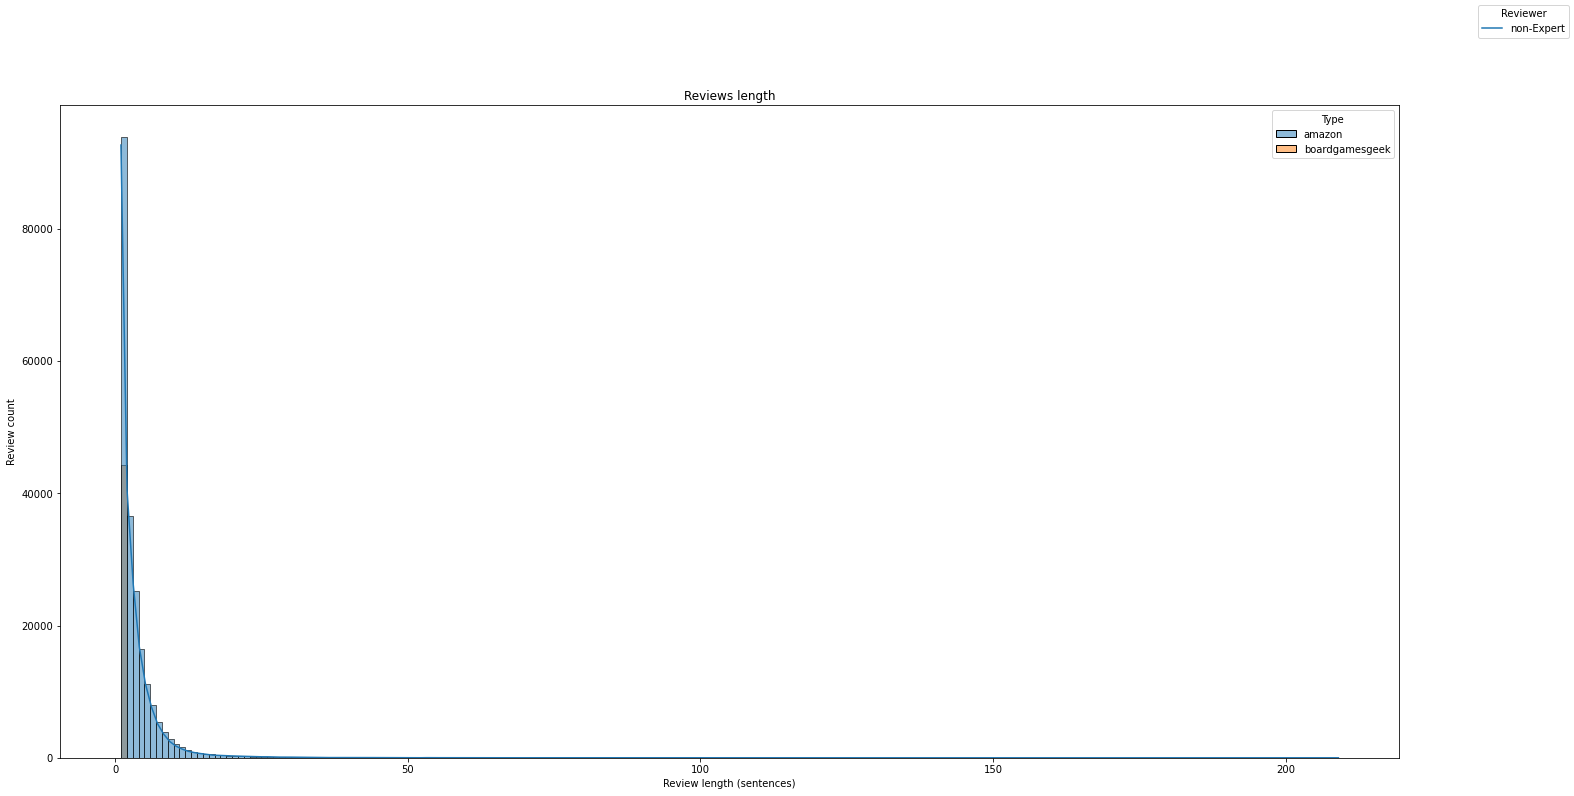

In [42]:
df_temp = df[df['sentence count']<]
fig, ax = plt.subplots(figsize=(24,12))
sns.histplot(data = df, x = 'sentence_count', ax=ax,  binwidth=1, hue='Type', kde=True)
ax.figure.legend(title='Reviewer', labels=['non-Expert'])
ax.set_title("Reviews length")
ax.set_ylabel('Review count')
ax.set_xlabel('Review length (sentences)')
plt.show()

# N-gram Analysis

In [5]:
def generate_fdist_ngram(n, reviews):
    fdist = nltk.FreqDist()
    for review in reviews:
        fdist.update(nltk.ngrams(str(review).split(" "),n))
    return(fdist)

In [6]:
#For BGG
reviews = amazon["lemmatize"].values

print("\n2-gram")
fdist_bigram_amazon = generate_fdist_ngram(2, reviews)
print(fdist_bigram_amazon.most_common(20))

print("\n3-gram")
fdist_trigram_amazon = generate_fdist_ngram(3, reviews)
print(fdist_trigram_amazon.most_common(20))


2-gram
[(('play', 'game'), 26906), (('game', 'play'), 26014), (('year', 'old'), 21295), (('board', 'game'), 19800), (('great', 'game'), 19315), (('love', 'game'), 17403), (('fun', 'game'), 16978), (('card', 'game'), 11053), (('lot', 'fun'), 9254), (('highly', 'recommend'), 9127), (('fun', 'play'), 8490), (('easy', 'learn'), 8045), (('much', 'fun'), 7840), (('game', 'fun'), 7119), (('time', 'play'), 7096), (('game', "'s"), 6846), (('game', 'great'), 6733), (('can', 'not'), 6659), (('game', 'like'), 6341), (('make', 'game'), 5914)]

3-gram
[(('fun', 'game', 'play'), 2089), (('5', 'year', 'old'), 2027), (('highly', 'recommend', 'game'), 2014), (('game', 'lot', 'fun'), 1934), (('6', 'year', 'old'), 1917), (('year', 'old', 'son'), 1903), (('4', 'year', 'old'), 1864), (('game', 'much', 'fun'), 1838), (('8', 'year', 'old'), 1785), (('7', 'year', 'old'), 1768), (('game', 'easy', 'learn'), 1730), (('year', 'old', 'love'), 1703), (('great', 'game', 'play'), 1659), (('love', 'play', 'game'), 153

In [12]:
fdist_bigram_amazon.plot(20,cumulative=False, color='blue', linewidth=4.0, label='Bi-grams')

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

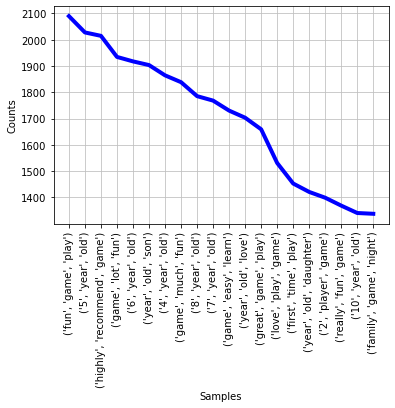

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [24]:
fdist_trigram_amazon.plot(20,cumulative=False, linewidth=4.0, color='blue')

In [12]:
#For BGG
reviews = bgg["lemmatize"].values


print("\n2-gram")
fdist_bigram_bgg = generate_fdist_ngram(2, reviews)
print(fdist_bigram_bgg.most_common(20))

print("\n3-gram")
fdist_trigram_bgg = generate_fdist_ngram(3, reviews)
print(fdist_trigram_bgg.most_common(20))



2-gram
[(('game', 'play'), 37349), (('play', 'game'), 30122), (('end', 'game'), 20717), (('player', 'game'), 20668), (('board', 'game'), 20457), (('victory', 'point'), 19672), (('feel', 'like'), 18807), (('card', 'game'), 17410), (('play', 'card'), 15365), (('can', 'not'), 15059), (('game', 'player'), 14582), (('card', 'play'), 14412), (('player', 'take'), 13636), (('game', "'s"), 12214), (('2', 'player'), 12167), (('make', 'game'), 12130), (('game', 'end'), 11935), (('one', 'player'), 11693), (('game', 'like'), 11662), (('game', 'game'), 11604)]

3-gram
[(('2', 'player', 'game'), 4568), (('player', 'take', 'turn'), 3433), (('point', 'end', 'game'), 2871), (('two', 'player', 'game'), 2851), (('worker', 'placement', 'game'), 2696), (('4', 'player', 'game'), 2305), (('player', "'s", 'turn'), 1880), (('game', 'feel', 'like'), 1737), (('depend', 'number', 'player'), 1510), (('game', 'have', 'play'), 1448), (('player', 'take', 'role'), 1402), (('3', 'player', 'game'), 1382), (('fantasy', '

In [25]:
fdist_bigram_bgg.plot(20,cumulative=False, color='Green',linewidth=4.0)

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [22]:
fdist_trigram_bgg.plot(20,cumulative=False, color='Green', linewidth=4.0)

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

# Relative Word Frequencies

In [62]:
s = amazon['word count'].sum()
s1 = bgg['word count'].sum()
#for key,value in rel_freq.items():
 #   rel_freq[key] = value/s1

In [74]:
rel_freq_bgg = {}
rel_freq_amazon = {}
for key,value in list(fdist_unigram_bgg.items()):
    k = key[0].replace('(','').replace(')','')
    val = value/s1
    rel_freq_bgg[k] = val
for key,value in list(fdist_unigram_amazon.items()):
    k = key[0].replace('(','').replace(')','')
    val = value/s1
    rel_freq_amazon[k] = val

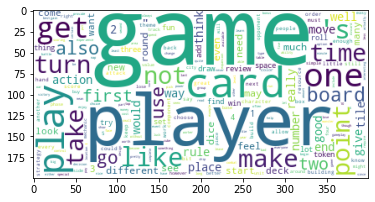

In [81]:
wc = WordCloud(background_color="white", max_words=1000,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(rel_freq_bgg)
plt.imshow(wc)

In [82]:
wc = WordCloud(background_color="white", max_words=1000,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(rel_freq_amazon)
plt.imshow(wc)

In [94]:
diff_bgg = {}
l_bgg = list(rel_freq_bgg.keys())
for key,value in rel_freq_amazon.items():
    if key in l_bgg:
        bv = value - rel_freq_bgg.get(key)
        dv = abs(bv)
        diff_bgg[key] = dv

In [102]:
wc = WordCloud(background_color="white", max_words=500,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(diff_bgg)
plt.imshow(wc)

In [99]:
diff = {}
l_amazon = list(rel_freq_amazon.keys())
for key,value in rel_freq_bgg.items():
    if key in l_amazon:
        continue
    else:
        diff[key] = value

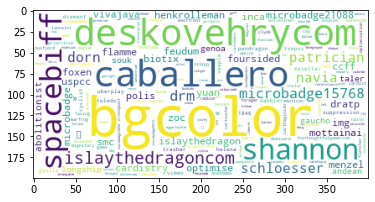

In [101]:
wc = WordCloud(background_color="white", max_words=500,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(diff)
plt.imshow(wc)

# Readability analysis

### Analysis of the folowing metrics:'coleman_liau_index', 'automated_readability_index', 'difficult_words', 'gunning_fog' and 'text_standard'

In [36]:
print('\t Amazon \t|\t\t BGG')
print(f'{amazon.flesch_kincaid_grade.describe()[1]} \t|\t {bgg.flesch_kincaid_grade.describe()[1]}')
print(f'{amazon.coleman_liau_index.describe()[1]} \t|\t {bgg.coleman_liau_index.describe()[1]}')
print(f'{amazon.automated_readability_index.describe()[1]} \t|\t {bgg.automated_readability_index.describe()[1]}')
print(f'{amazon.gunning_fog.describe()[1]} \t|\t {bgg.gunning_fog.describe()[1]}')

	 Amazon 	|		 BGG
17.560501774443914 	|	 250.9456088027311
8.711522300311817 	|	 8.91523441559894
18.955494262708843 	|	 96.46365936871545
16.30682428126828 	|	 254.5083827018232


In [29]:
amazon.flesch_kincaid_grade.describe()

count    214997.000000
mean         17.560502
std          27.059272
min          -3.500000
25%           6.500000
50%          10.100000
75%          18.000000
max         800.800000
Name: flesch_kincaid_grade, dtype: float64

In [110]:
bgg.flesch_kincaid_grade.describe()

count    44259.000000
mean       250.945609
std        198.518360
min         -3.100000
25%        129.300000
50%        203.400000
75%        313.800000
max       4350.300000
Name: flesch_kincaid_grade, dtype: float64

In [111]:
amazon.automated_readability_index.describe()

count    214997.000000
mean         18.955494
std          33.408919
min          -9.100000
25%           6.400000
50%          10.200000
75%          17.600000
max        1025.300000
Name: automated_readability_index, dtype: float64

In [112]:
bgg.automated_readability_index.describe()

count    44259.000000
mean        96.463659
std        197.737923
min         -5.100000
25%         12.400000
50%         16.600000
75%         64.500000
max       3185.900000
Name: automated_readability_index, dtype: float64

In [113]:
amazon.coleman_liau_index.describe()

count    214997.000000
mean          8.711522
std           6.641972
min         -22.210000
25%           6.080000
50%           7.990000
75%           9.980000
max         517.200000
Name: coleman_liau_index, dtype: float64

In [114]:
bgg.coleman_liau_index.describe()

count    44259.000000
mean         8.915234
std          1.687088
min        -13.210000
25%          8.020000
50%          8.900000
75%          9.770000
max        152.340000
Name: coleman_liau_index, dtype: float64

In [115]:
amazon.gunning_fog.describe()

count    214997.000000
mean         16.306824
std          26.807367
min           0.400000
25%           6.400000
50%           9.520000
75%          14.820000
max         822.500000
Name: gunning_fog, dtype: float64

In [116]:
bgg.gunning_fog.describe()

count    44259.000000
mean       254.508383
std        203.239271
min          0.400000
25%        129.975000
50%        205.560000
75%        318.615000
max       4457.430000
Name: gunning_fog, dtype: float64

In [117]:
amazon.text_standard.describe()

count                214997
unique                  344
top       6th and 7th grade
freq                  22872
Name: text_standard, dtype: object

In [118]:
bgg.text_standard.describe()

count                   44259
unique                    872
top       10th and 11th grade
freq                     4712
Name: text_standard, dtype: object

## Readability - Text Standard Analysis

In [3]:
def upperbound_grades(text):
    lower_grade = int(re.findall('[+-]?\d+', text)[0])
    if(lower_grade>=17):
        return "Graduate"
    elif (lower_grade <= 0):
        return "Kindergarten"
    else:
        return text

In [4]:
def lowerbound_grades(text):
    try:
        lower_grade = int(re.findall('[+-]?\d+', text)[0])
    except:
        lower_grade = text
    if(lower_grade == 'Graduate'):
        return 17
    elif (lower_grade == 'Kindergarten'):
        return 0
    else:
        return lower_grade

In [6]:
df_merged = pd.read_csv("../datasets/final_merged.csv", usecols=['text_standard', 'Type'])
df_merged['text_standard'] = df_merged['text_standard'].apply(upperbound_grades)
df_merged['lowerbond_number'] = df_merged['text_standard'].apply(lowerbound_grades)
df_merged = df_merged.sort_values('lowerbond_number')

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data = df_merged[df_merged["Type"]=="amazon"], x = 'text_standard', kde=True)
ax.set_title("Readibility Analysis - BGG Reviews")
ax.set_ylabel('Review count')
ax.set_xlabel('Text Standard Score')
plt.xticks(rotation=90)
plt.show()
#plt.savefig('Readibility Analysis - Amazon Reviews.png', bbox_inches="tight")

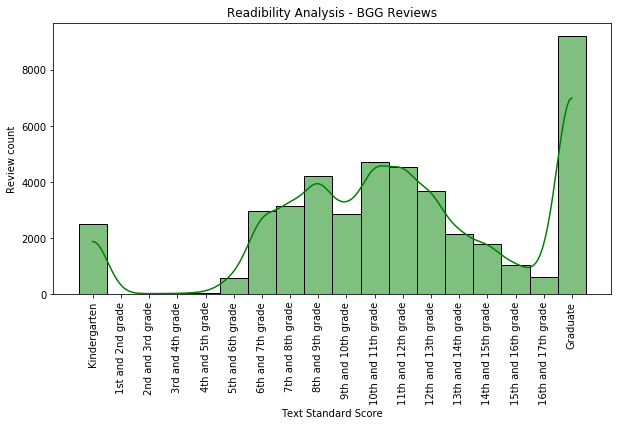

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data = df_merged[df_merged["Type"]=="boardgamesgeek"], x = 'text_standard', kde=True, color="green")
ax.set_title("Readibility Analysis - BGG Reviews")
ax.set_ylabel('Review count')
ax.set_xlabel('Text Standard Score')
plt.xticks(rotation=90)
plt.show()
#plt.savefig('Readibility Analysis - BGG Reviews.png', bbox_inches="tight")

# Sentiment Analysis

In [103]:
def document_sentiment(text):
    doc = nlp(text)
    sentiments = [sentence.sentiment for sentence in doc.sentences]
    num_sentences = len(doc.sentences)
    negative = Counter(sentiments)[0]/num_sentences if Counter(sentiments)[0] else 0 
    neutral = Counter(sentiments)[1]/num_sentences if Counter(sentiments)[1] else 0 
    positive = Counter(sentiments)[2]/num_sentences if Counter(sentiments)[2] else 0 
    return negative, neutral, positive

In [107]:
amazon_len = len(amazon)
neg = amazon["sent_negative"].sum()/amazon_len
neu = amazon["sent_neutral"].sum()/amazon_len
pos = amazon["sent_positive"].sum()/amazon_len
print("Overall probability Amazon:")
print(f'negative {neg}')
print(f'neutral {neu}')
print(f'positive {pos}')
print(f'sum_all {neg+neu+pos}')
print(f'sentimental {pos+neg}')

Overall probability Amazon:
negative 0.19277206992567
neutral 0.30311258070985225
positive 0.5041153493644777
sum_all 0.9999999999999999
sentimental 0.6968874192901476


In [108]:
bgg_len = len(bgg)
neg = bgg["sent_negative"].sum()/bgg_len
neu = bgg["sent_neutral"].sum()/bgg_len
pos = bgg["sent_positive"].sum()/bgg_len
print("Overall probability BGG:")
print(f'negative {neg}')
print(f'neutral {neu}')
print(f'positive {pos}')
print(f'sum_all {neg+neu+pos}')
print(f'sentimental {pos+neg}')

Overall probability BGG:
negative 0.1580836689173945
neutral 0.699696665169256
positive 0.14221966591334953
sum_all 1.0
sentimental 0.300303334830744


Prediction of expert and non-expert reviews

In [13]:
bgg['sentence_count'].describe()

count    44259.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: sentence_count, dtype: float64